# OSM Downloading

## Import Packages

In [1]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import importlib
import numpy as np
import pickle

#custom
import osm_download_functions #contains functions for downloaded data from OSMnx and Overpass API

# Filepaths and Desired Projection

In [2]:
# #mgarber
# #or input a geodataframe
# studyarea_fp = Path.home() / 'Downloads/mgarber/monpon_sf_6mi.shp'
# studyarea_or_bbox = gpd.read_file(studyarea_fp)
# export_folder = Path.home() / 'Downloads/mgarber'
# crs = "epsg:4326"

In [3]:
# #either input a bounding box in (xmin, ymin, xmax, ymax) format (must be a geographic projection)
# studyarea_or_bbox = (-84.38923551270372,33.74521971907766,-84.37570780621328,33.75884348028874)
# export_folder = Path.home() / 'Downloads'
# crs = "epsg:2240"

#or input a geodataframe
studyarea_fp = Path.home() / 'Documents/BikewaySimData/Data/Study Areas/itp.gpkg'
studyarea_or_bbox = gpd.read_file(studyarea_fp)
export_folder = Path.home() / 'Documents/BikewaySimData/Projects/gdot/networks'
crs = "epsg:2240"

# studyarea_fp = (Path.home() / 'Documents/TransitSimData/Data/base_layers.gpkg','studyarea')
# studyarea_or_bbox = gpd.read_file(studyarea_fp)
# export_folder = Path.home() / 'Documents/TransitSimData/Data/networks'
# crs = "epsg:2240"

## Download OSM geometry using OSMnx and attribute data using Overpass API
More info about OSMnx: https://geoffboeing.com/2016/11/osmnx-python-street-networks/  
OSMnx documentation: https://osmnx.readthedocs.io/en/stable/index.html

If you already know all the OSM edge attributes you want to retain. Provide it as a list of string in the "desired_osm_attributes" argument in the the download_osm function.

NOTE: For large scale study areas (countries/states/etc.) it is likely better to download an OSM planet file and then use OSMnx to process it (this feature will be added in the future).

GeoDataFrame provided
The bounding box is -84.50277879007575, 33.616441106566896, -84.22989638525735, 33.92224265863322


c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


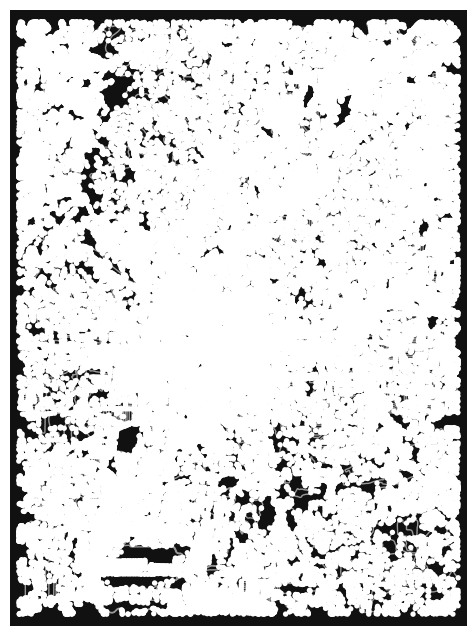

c:\Users\tpassmore6\Documents\GitHub\BikewaySimDev\osm_download\osm_download_functions.py:133: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'tags.', '')


In [4]:
osmnx_nodes, osmnx_links, overpass_links = osm_download_functions.download_osm(studyarea_or_bbox,crs)

In [5]:
#merge osmnx and overpass data on link id
osm_links = pd.merge(osmnx_links, overpass_links, left_on=('osmid'), right_on=('id'), how = 'left')

# #pickle all attributes as is
# with (export_folder/'osm.pkl').open('wb') as fh:
#     pickle.dump(osm_links,fh)

# #remove columns with lists in them (handle these later)
# for col in osm_links.columns.tolist():
#     if list in [type(x) for x in osm_links.loc[:,col]]:
#         osm_links.drop(columns=col,inplace=True)
#         print(f"{col} column removed for containing a list")

## Export

In [6]:
#pickle all attributes as is
with (export_folder/'osm_nodes.pkl').open('wb') as fh:
    pickle.dump(osmnx_nodes,fh)

In [7]:
#pickle all attributes as is
with (export_folder/'osm_links.pkl').open('wb') as fh:
    pickle.dump(osm_links,fh)